<a href="https://colab.research.google.com/github/Praewphat/bsc_dpdm22/blob/main/%5Bdataprep3_Discretization_Normalization_One_hot_Encoder%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

In [39]:
weather_data=pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/data/Group4_ณัฐกรณ์_ภัทราวดี_ศศิวิมล_สุจิรา.xlsx')

In [40]:
weather_data.shape

(8169, 13)

In [41]:
data_features = weather_data.iloc[:,4:-1]
data_features.head()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณฝน,ปริมาณเมฆ
0,3.0,1005.47,27.6,9.0,24.2,83,1.4,9.0
1,2.0,1006.65,25.6,10.0,24.0,92,17.7,10.0
2,3.0,1007.49,25.6,10.0,22.9,86,3,10.0
3,2.0,1008.28,25.8,8.0,21.9,80,0,8.0
4,2.0,1009.88,24.3,10.0,21.7,86,2.2,10.0


In [42]:
data_features.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณเมฆ
count,8113.000000,8169.000000,8169.000000,7838.000000,8169.000000,8169.000000,7838.000000
mean,2.322569,1013.111413,24.755013,3.299566,17.915204,69.305178,3.299566
std,1.311215,3.242448,2.843517,2.367818,3.819495,9.028821,2.367818
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000
25%,1.000000,1011.040000,23.100000,1.000000,15.500000,63.000000,1.000000
50%,2.000000,1012.890000,25.200000,3.000000,18.200000,69.000000,3.000000
75%,3.000000,1015.120000,26.900000,5.000000,20.800000,74.000000,5.000000
max,11.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,10.000000


In [43]:
data_features.dtypes

ความเร็วลม            float64
ความกด                float64
อุณหภูมิตุ้ม          float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิจุดต่ำสุด     float64
ความชื้น                int64
ปริมาณฝน               object
ปริมาณเมฆ             float64
dtype: object

In [ ]:
data_features['ความเร็วลม'] = data_features['']

In [45]:
data_features[data_features['ความเร็วลม'].eq('-')] #.eq คือ เลือกความเร็วลมที่เป็น - มา

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณฝน,ปริมาณเมฆ


In [62]:
data_features_d= data_features[data_features['ปริมาณฝน'].eq('T')==False] #ชื่อตาราง .eq = ในตารางนี้ อันไหนเจอค่า "T" จะเลือกมาทั้งหมด , any(1) ทุกๆคอลัมน์ ; drop แล้วเหลือ 7959 row
data_features_d= data_features_d[data_features['ปริมาณฝน'].eq('-')==False] #ชื่อตาราง .eq = ในตารางนี้ อันไหนเจอค่า "-" จะเลือกมาทั้งหมด


แปลงให้เป็นตัวเลข

In [66]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)#เปลี่ยนให้เป็นเลข เก็บข้อมูลได้
data_features_d['ปริมาณเมฆ'] = data_features_d['ปริมาณเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิจุดต่ำสุด	'] = data_features_d['อุณหภูมิจุดต่ำสุด'].astype(float)


In [67]:
data_features_d.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณฝน,ปริมาณเมฆ,อุณหภูมิจุดต่ำสุด\t
count,5729.000000,5778.000000,5778.000000,5558.000000,5778.000000,5778.000000,5778.000000,5558.000000,5778.000000
mean,2.253273,1012.970076,24.809934,3.323678,17.981014,69.410869,1.221582,3.323678,17.981014
std,1.223140,3.234548,2.790382,2.447090,3.762340,9.438618,5.881711,2.447090,3.762340
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000,0.000000,1.500000
25%,1.000000,1010.960000,23.200000,1.000000,15.600000,63.000000,0.000000,1.000000,15.600000
50%,2.000000,1012.765000,25.300000,3.000000,18.100000,68.000000,0.000000,3.000000,18.100000
75%,3.000000,1014.967500,26.900000,5.000000,20.800000,75.000000,0.000000,5.000000,20.800000
max,10.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,112.400000,10.000000,28.400000


In [88]:
import matplotlib
matplotlib.rcParams['figure.figsize'] =[8,9]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s

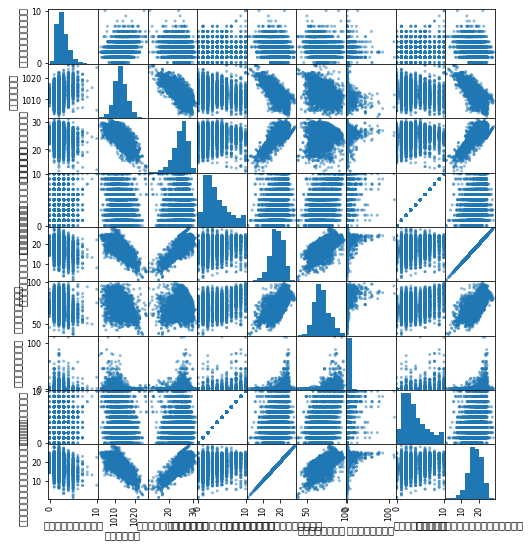

In [69]:
pd.plotting.scatter_matrix(data_features_d);

In [53]:
from sklearn import preprocessing

##Standard scaler

In [70]:
#define
scaler = preprocessing.StandardScaler()
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_s = scaler.transform(data_features_d)

In [71]:
data_features_d_s

array([[ 0.61055332, -2.31894108,  0.9999731 , ...,  0.03033702,
         2.31983008,  1.65309991],
       [-0.20708576, -1.95409806,  0.2831634 , ...,  2.80187907,
         2.72851547,  1.5999369 ],
       [ 0.61055332, -1.69437929,  0.2831634 , ...,  0.30239022,
         2.72851547,  1.30754037],
       ...,
       [-1.02472484, -2.50754638,  0.5340468 , ..., -0.20770954,
        -1.35833849, -1.32402844],
       [-0.20708576, -2.22927627,  0.13980146, ..., -0.20770954,
        -0.5409677 , -1.11137642],
       [ 0.61055332, -1.47176321,  0.2831634 , ..., -0.20770954,
        -0.94965309, -0.73923537]])

##min-max normalization

In [ ]:
#define
scaler = preprocessing.StandardScaler()
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_s = scaler.transform(data_features_d)

# Discritization

In [82]:
home_data=pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/data/29. ภัทรวดี นาดี.csv')

In [83]:
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [84]:
home_data.shape

(100, 22)

#ลบ record ที่ ค่า sell price เป็นค่าว่าง

In [86]:
home_data = home_data.dropna(subset=['sell_price'])

In [98]:
from matplotlib import pyplot as plt

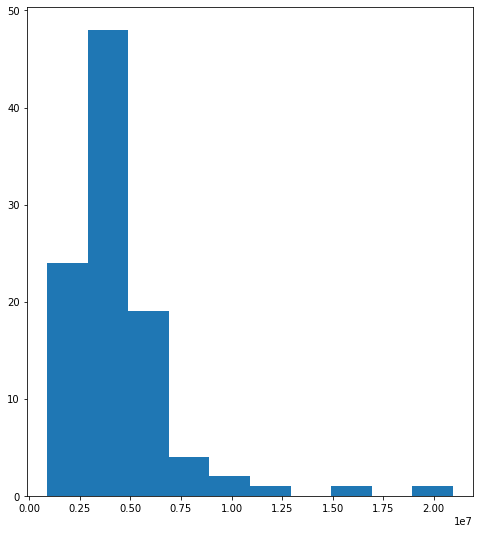

In [101]:
plt.hist(home_data['sell_price']);

#แปลงค่า sell_price
* ราคาต่ำกว่า 500m ให้เป็น 1
* ราคาระหว่าง 500m-1m ให้เป็น 2 
* ราคา 1m ขึ้นไป ให้เป็น 3 

#one-hot-encoder

In [114]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone']) 


In [116]:
home_data_dummies 

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11,zone_1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
